In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from import_me import *

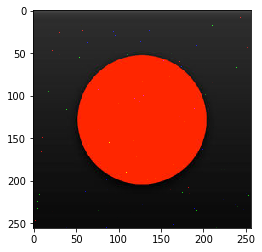

In [35]:
array = readSave(readfileName = "output.data")
plt.imshow(plt.imread("output.bmp"))

In [10]:
with open("output.data", "rb") as f:
    b = f.read()
rcv = np.frombuffer(b, dtype = np.uint8)

In [11]:
rcv = rcv[122:]

In [12]:
search_sequence_numpy(rcv, np.array([66, 77]))

array([176935, 176936])

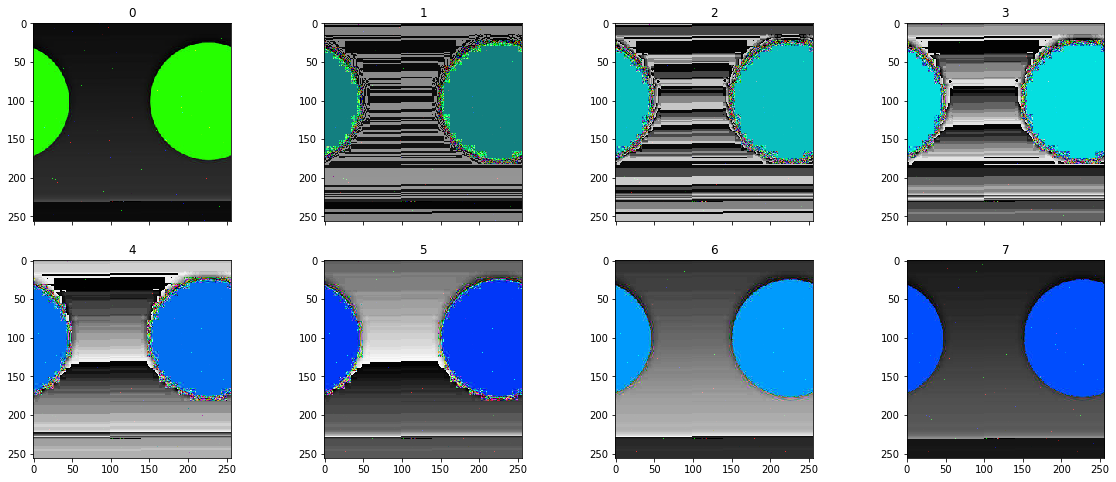

In [19]:
fig, ax = plt.subplots(2, 4, sharex=True, figsize=(20, 8))


#0, 1, 2
roll_cor = 1

for i in range(8):
    rcv_t = np.roll(np.packbits(np.roll(np.unpackbits(rcv), i)), roll_cor)
    ax[i//4, i%4].set_title(i)
    ax[i//4, i%4].imshow(rcv_t.reshape(256, 256, 3))

In [38]:
rcv[196608//2 :]

array([191, 192,   9, ...,  44,  44,  44], dtype=uint8)

In [39]:
array.shape[0] == 256 * 256 * 3 + 122

True

In [4]:
with open("red_dot.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

In [5]:
orig

array([ 66,  77, 122, ...,  72,  72,  72], dtype=uint8)

In [6]:
array

array([ 66,  77, 122, ...,  72,  72,  72], dtype=uint8)

In [36]:
np.sum(np.equal(orig, array))

196576

In [ ]:
#sem hamming: 196606, 196576

In [ ]:
#com hamming: 196629, 196639

In [7]:
len(np.nonzero(orig - array)[0])

133

In [67]:
orig[np.nonzero(orig - array)[0][x]], array[np.nonzero(orig - array)[0][x]]

(45, 29)

In [70]:
np.nonzero(np.unpackbits(orig) - np.unpackbits(array))

(array([    853,     854,     979, ..., 1520049, 1548760, 1548761]),)

In [79]:
(np.unpackbits(orig) - np.unpackbits(array))

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)